# **Music genre classification using CRNN**

### Data download - https://paperswithcode.com/dataset/gtzan
## GTZAN
The gtzan8 audio dataset contains 1000 tracks of 30 second length. There are 10 genres, each containing 100 tracks which are all 22050Hz Mono 16-bit audio files in .wav format. The genres are:

- blues
- classical
- country
- disco
- hiphop
- jazz
- metal
- pop
- reggae
- rock

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install required libraries
!pip install librosa

In [3]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.utils import to_categorical


data_path = '/content/drive/MyDrive/music'

# Load features data
features_30_sec = pd.read_csv(os.path.join(data_path, 'features_30_sec.csv'))
features_3_sec = pd.read_csv(os.path.join(data_path, 'features_3_sec.csv'))

# Print basic information about the dataset
features_30_sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
features_3_sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
features_30_sec.isna().sum()
features_3_sec.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

### Data preprocessing and Visualization




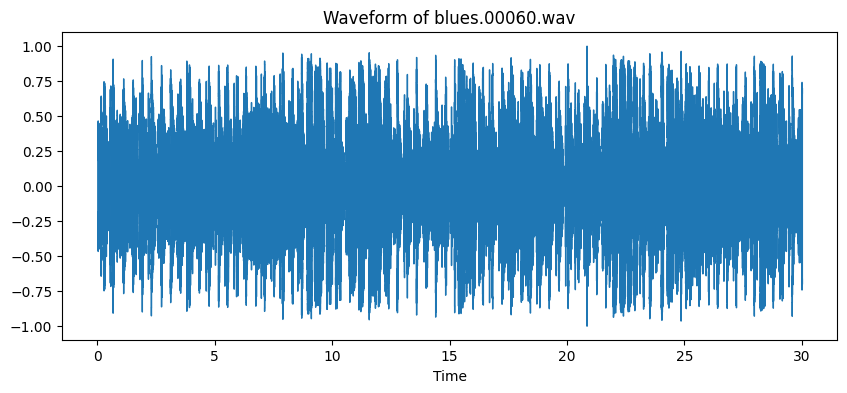

In [6]:
# Function to load and preprocess audio files
def load_audio_files(file_path, sr=22050):
    audio, sr = librosa.load(file_path, sr=sr)
    audio = librosa.util.normalize(audio)
    return audio

# Specify the directory for the genre you are interested in
genre_directory = os.path.join(data_path, 'genres_original', 'blues')

# List all files in the directory
audio_files = sorted(os.listdir(genre_directory))

# Check if there are any audio files
if not audio_files:
    raise ValueError("No audio files found in the specified directory.")

# Select a file by index, for example, the first file
selected_file = audio_files[60]  # Change 0 to other indices to select different files

# Construct the full path of the selected audio file
file_path = os.path.join(genre_directory, selected_file)

# Load and process the audio file
audio = load_audio_files(file_path)

# Display the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=22050)
plt.title(f'Waveform of {selected_file}')
plt.show()

<ipython-input-7-fcbeff410a4d>:10: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spec = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)


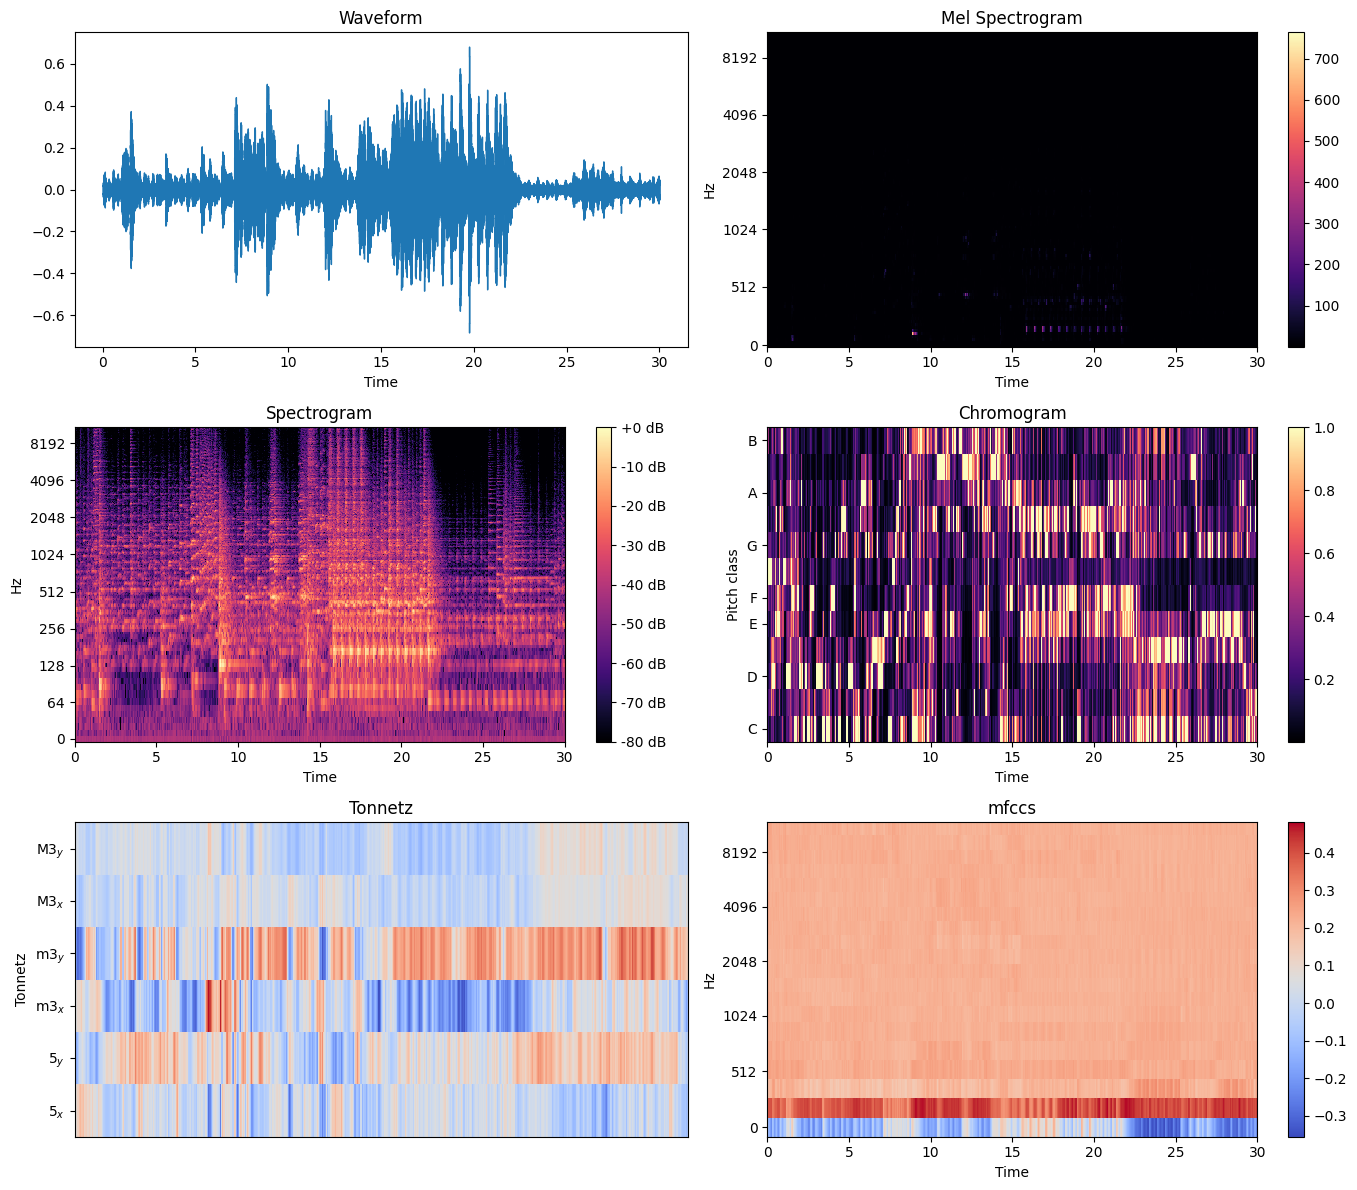

In [7]:
# Load an audio file
genre_dir = os.path.join(data_path, 'genres_original', 'jazz')
audio_files = sorted(os.listdir(genre_dir))
file_path = os.path.join(genre_dir, audio_files[0])
audio_data, sr = librosa.load(file_path, sr=22050)

# Compute features
mfccs = librosa.feature.mfcc(y=audio_data, sr=sr)
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
spec = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)
tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio_data), sr=sr)
melspec = librosa.feature.melspectrogram(y=audio_data, sr=sr)

# Create a figure and subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))


# Plot waveform
librosa.display.waveshow(audio_data, sr=sr, ax=ax[0, 0])
ax[0, 0].set_title('Waveform')

# Plot mel spectrogram
img = librosa.display.specshow(melspec, y_axis='mel', x_axis='time', ax=ax[0, 1])
ax[0, 1].set_title('Mel Spectrogram')
fig.colorbar(img, ax=ax[0, 1])

# Plot spectrogram
img = librosa.display.specshow(spec, y_axis='log', x_axis='time', ax=ax[1, 0])
ax[1, 0].set_title('Spectrogram')
fig.colorbar(img, ax=ax[1, 0], format="%+2.f dB")

# Plot chromogram
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1, 1])
ax[1, 1].set_title('Chromogram')
fig.colorbar(img, ax=ax[1, 1])

# Plot tonnetz
img = librosa.display.specshow(tonnetz, y_axis='tonnetz', ax=ax[2, 0])
ax[2, 0].set_title('Tonnetz')

# Display MFCCs as an image
librosa.display.specshow(mfccs, y_axis='mel', x_axis='time', ax=ax[2,1])
ax[2, 1].set_title('mfccs')
fig.colorbar(img, ax=ax[2, 1])

# Adjust spacing and display
plt.tight_layout()
plt.show()

In [8]:
print(chroma)

[[0.22798628 0.20825347 0.24378935 ... 0.56975865 0.64165604 0.7282347 ]
 [0.07379121 0.06591099 0.12726209 ... 1.         1.         1.        ]
 [0.09918181 0.07915869 0.09324221 ... 0.2536672  0.26166546 0.5279062 ]
 ...
 [0.20618002 0.18419713 0.18498038 ... 0.04290158 0.06392407 0.13106038]
 [0.16467275 0.14656815 0.17792082 ... 0.04803463 0.08392712 0.18846565]
 [0.46056688 0.7644778  1.         ... 0.10736358 0.17635614 0.32606855]]


In [9]:
# Print basic information about the dataset
print("Features (30 sec) dataset info:")
print(features_30_sec.info())
print("\nFeatures (3 sec) dataset info:")
print(features_3_sec.info())

Features (30 sec) dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float6

In [10]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
# Split the dataset into numerical and categorical columns
num_cols_30 = features_30_sec.select_dtypes(include=['float64', 'int64']).columns
cat_cols_30 = features_30_sec.select_dtypes(include=['object']).columns

num_cols_3 = features_3_sec.select_dtypes(include=['float64', 'int64']).columns
cat_cols_3 = features_3_sec.select_dtypes(include=['object']).columns

# Separate numerical and categorical columns
X_num_30 = features_30_sec[num_cols_30]
X_cat_30 = features_30_sec[cat_cols_30]

X_num_3 = features_3_sec[num_cols_3]
X_cat_3 = features_3_sec[cat_cols_3]

# Normalize numerical columns
scaler = StandardScaler()
X_num_30_scaled = pd.DataFrame(scaler.fit_transform(X_num_30), columns=X_num_30.columns)
X_num_3_scaled = pd.DataFrame(scaler.fit_transform(X_num_3), columns=X_num_3.columns)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X_cat_30_encoded = X_cat_30.apply(encoder.fit_transform)
X_cat_3_encoded = X_cat_3.apply(encoder.fit_transform)

# Combine the scaled numerical and encoded categorical columns
features_30_sec_scaled = pd.concat([X_num_30_scaled, X_cat_30_encoded], axis=1)
features_3_sec_scaled = pd.concat([X_num_3_scaled, X_cat_3_encoded], axis=1)

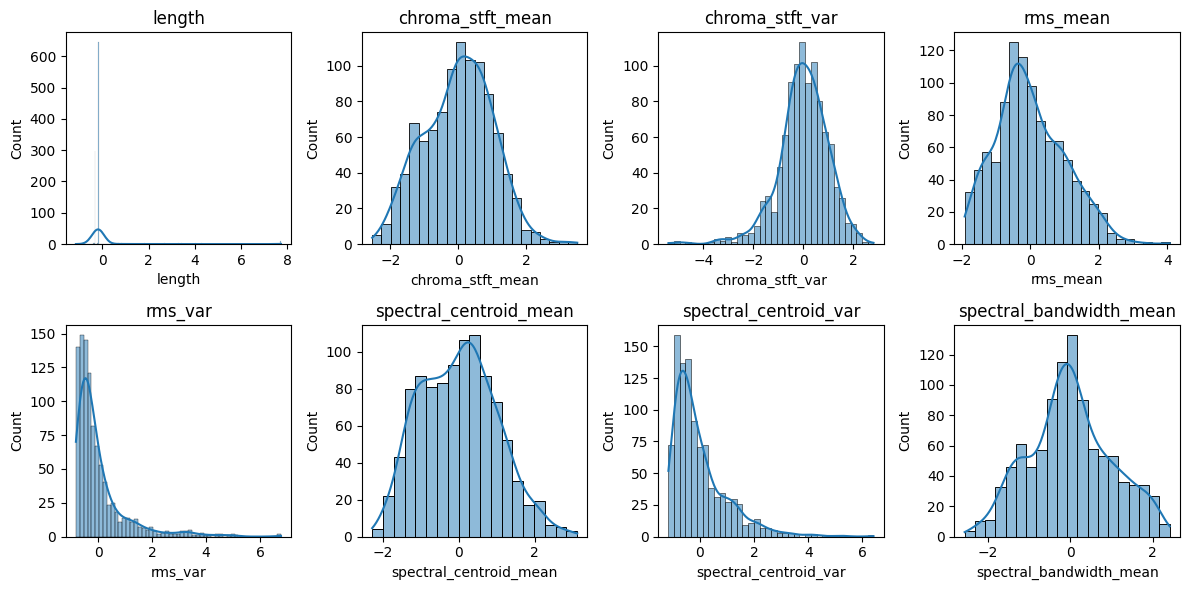

In [22]:
# Visualize feature distributions
plt.figure(figsize=(12, 6))
for i, col in enumerate(features_30_sec_scaled.columns[:8]):
    plt.subplot(2, 4, i+1)
    sns.histplot(data=features_30_sec_scaled, x=col, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

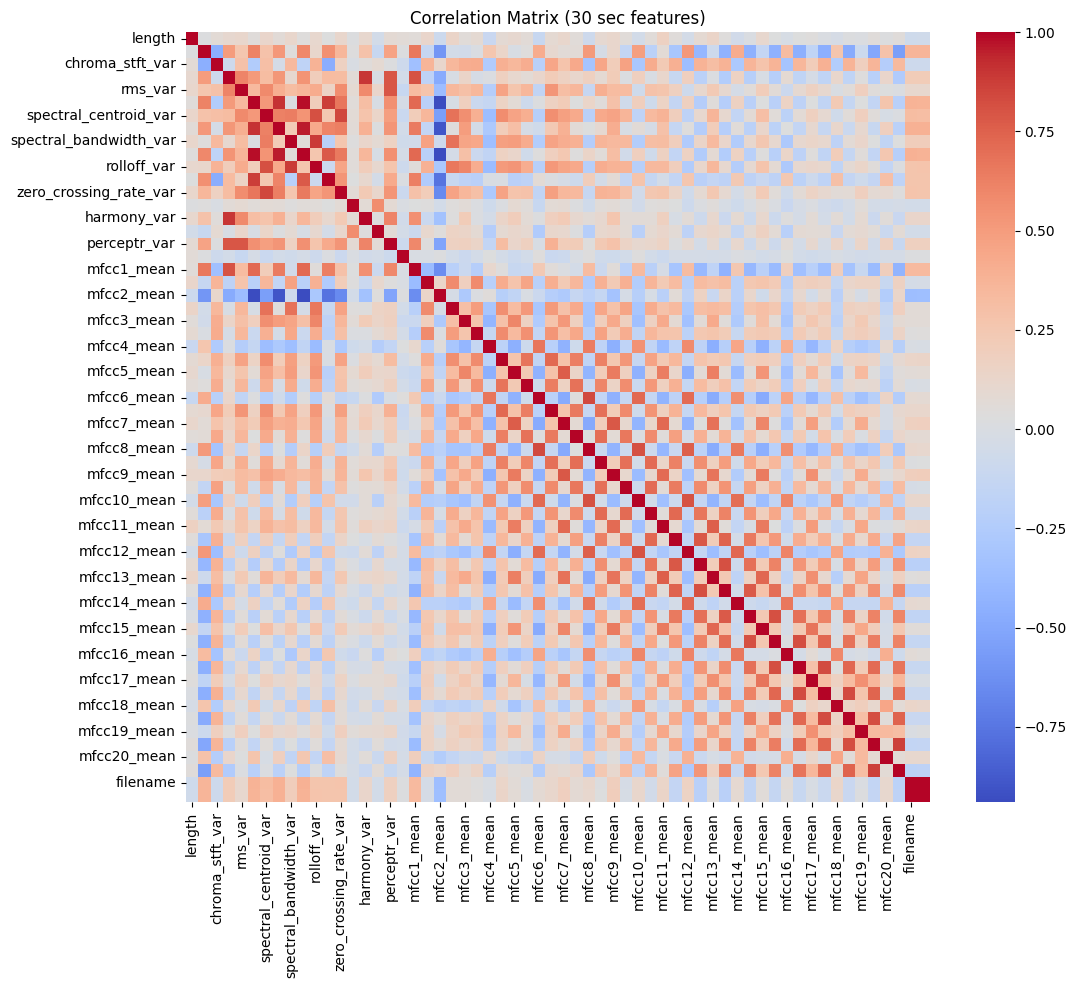

In [12]:
# Compute correlation matrix
corr_matrix = features_30_sec_scaled.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix (30 sec features)')
plt.show()

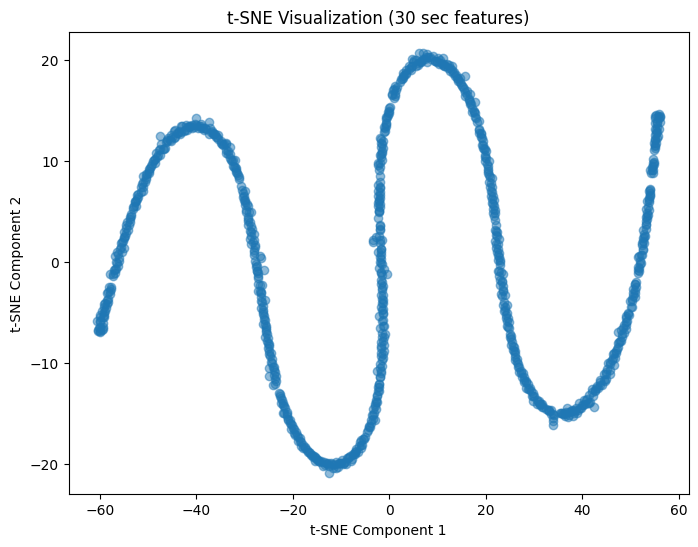

In [13]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_30_sec_scaled)

# Visualize t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization (30 sec features)')
plt.show()

I used t-Distributed Stochastic Neighbor Embedding (t-SNE) to visualize the high-dimensional feature data in a 2D space. This can help identify potential clusters or patterns in the data that might not be apparent in the original feature space. We can see that t-SNE visualization exhibited clearer and more defined clusters, capturing local structures and revealing complex relationships among data points.

Throughout this EDA process, we can identify potentially relevant features for genre classification based on their distributions, correlations, and the insights gained from dimensionality reduction techniques like t-SNE. Additionally, we can explore the relationships between features and genres by coloring the data points in the visualizations based on their genre labels.

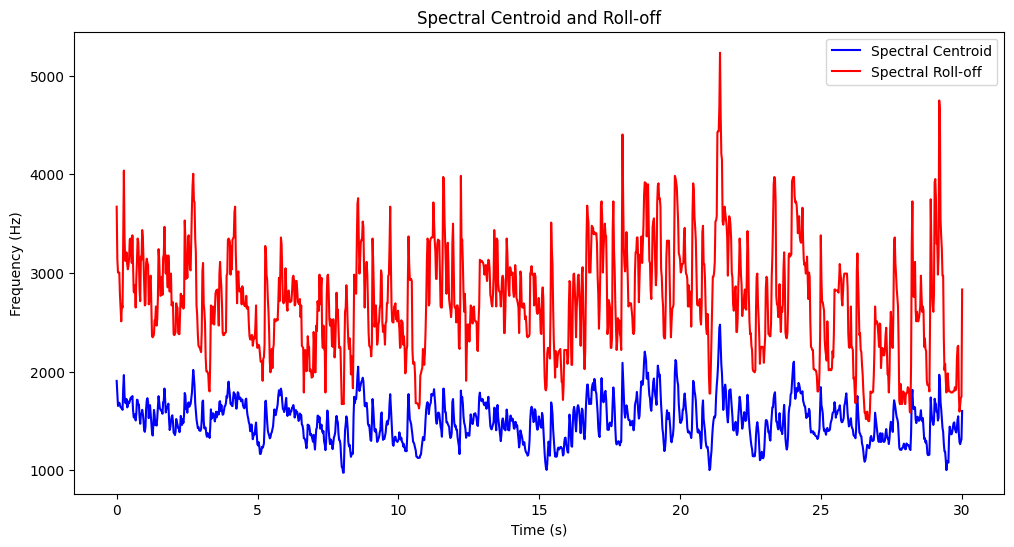

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
y, sr = librosa.load('/content/drive/MyDrive/music/genres_original/classical/classical.00000.wav')

# Compute the spectral centroid and roll-off
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

# Plotting
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(12, 6))
plt.plot(t, spectral_centroids, color='b', label='Spectral Centroid')
plt.plot(t, spectral_rolloff, color='r', label='Spectral Roll-off')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Centroid and Roll-off')
plt.legend()
plt.show()

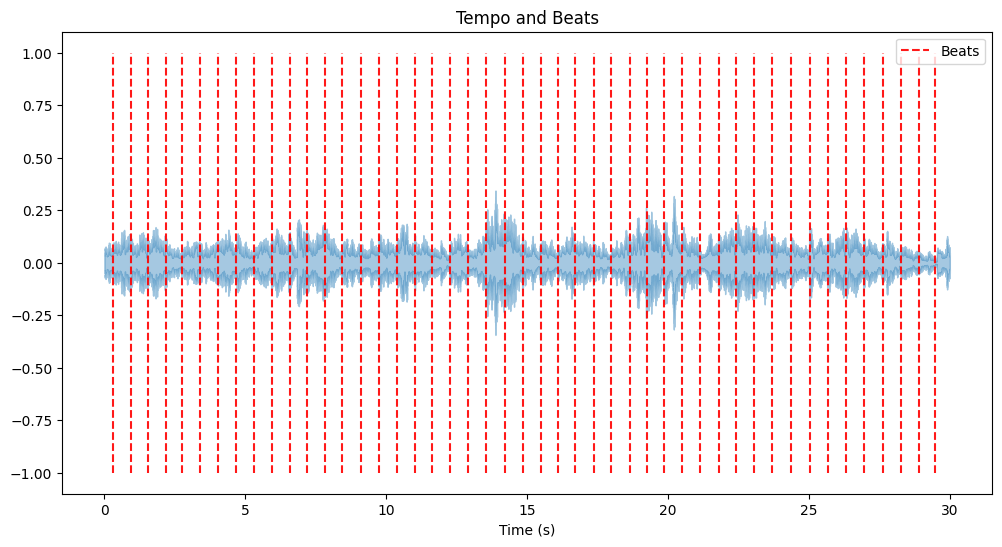

In [15]:
# Compute the tempo and beat
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

# Plotting
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.vlines(librosa.frames_to_time(beats, sr=sr), ymin=-1, ymax=1, color='r', alpha=0.9, linestyle='--', label='Beats')
plt.title('Tempo and Beats')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

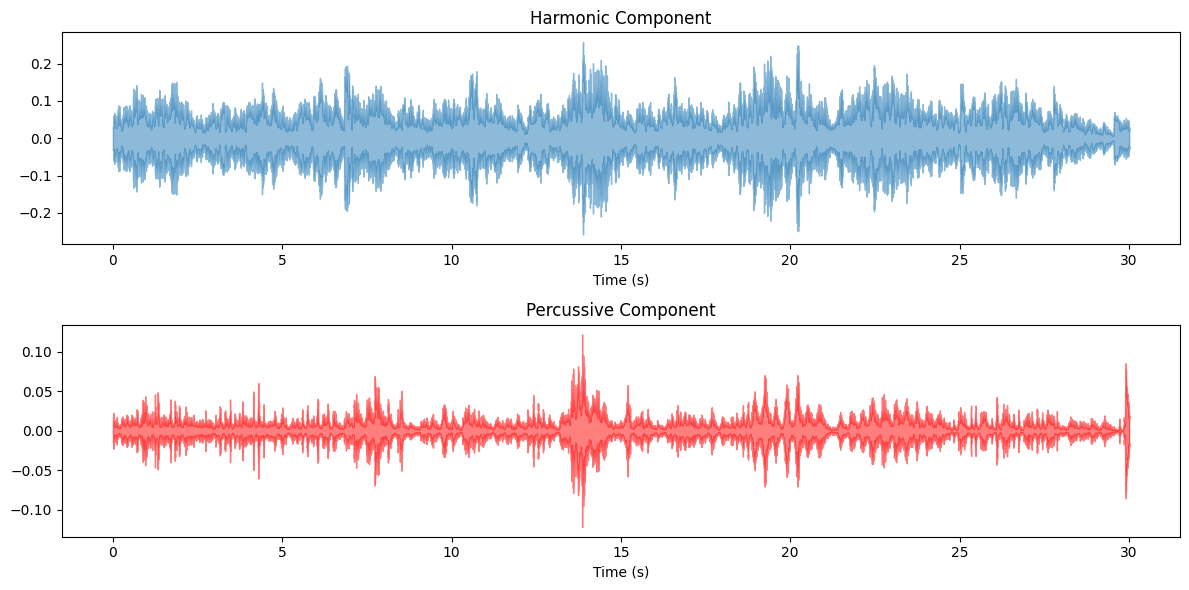

In [16]:
# Separate harmonic and percussive components
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.5)
plt.title('Harmonic Component')
plt.xlabel('Time (s)')

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Percussive Component')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

### Model #1: Before PCA
- dataset train-test split and label encoding
- Model building **Convolutional Recurrent Neural Network (CRNN) architecture.**
- It Incorporates techniques like batch normalization, max pooling, and data augmentation
- Making two methods of training: 1) with PCA 2) without PCA

Encoding labels.
Splitting data into training and testing sets.
Training model on original data.
Building and compiling the CRNN model.
Starting model training.
Epoch 1/50
250/250 [==============================] - 13s 18ms/step - loss: 1.1881 - accuracy: 0.4985 - val_loss: 4.3009 - val_accuracy: 0.0931
Epoch 2/50
250/250 [==============================] - 2s 9ms/step - loss: 0.7964 - accuracy: 0.6697 - val_loss: 1.0964 - val_accuracy: 0.6106
Epoch 3/50
250/250 [==============================] - 2s 9ms/step - loss: 0.6118 - accuracy: 0.7511 - val_loss: 1.3825 - val_accuracy: 0.5005
Epoch 4/50
250/250 [==============================] - 2s 8ms/step - loss: 0.5593 - accuracy: 0.7857 - val_loss: 2.4726 - val_accuracy: 0.5285
Epoch 5/50
250/250 [==============================] - 2s 9ms/step - loss: 0.4466 - accuracy: 0.8256 - val_loss: 0.7923 - val_accuracy: 0.6782
Epoch 6/50
250/250 [==============================] - 5s 19ms/step - loss: 0.4202 - accuracy: 0.8423 - val_loss: 3.4817 - val_a

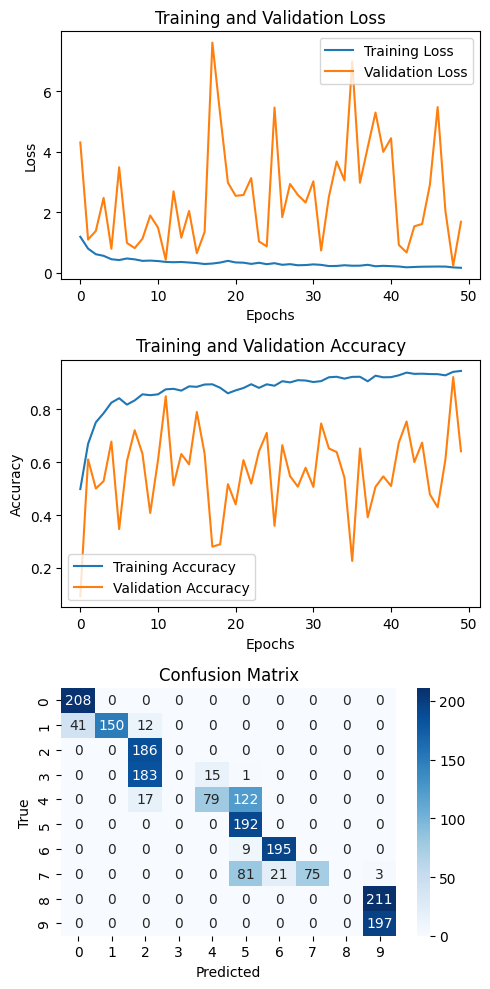

Classification Report:
               precision    recall  f1-score   support

       blues       0.84      1.00      0.91       208
   classical       1.00      0.74      0.85       203
     country       0.47      1.00      0.64       186
       disco       0.00      0.00      0.00       199
      hiphop       0.84      0.36      0.51       218
        jazz       0.47      1.00      0.64       192
       metal       0.90      0.96      0.93       204
         pop       1.00      0.42      0.59       180
      reggae       0.00      0.00      0.00       211
        rock       0.48      1.00      0.65       197

    accuracy                           0.64      1998
   macro avg       0.60      0.65      0.57      1998
weighted avg       0.60      0.64      0.57      1998



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GRU, Bidirectional, Reshape

def build_and_train_model(X_train, X_test, y_train, y_test, input_shape):
    print("Building and compiling the CRNN model.")
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', input_shape=(1, 1, input_shape)), #(32x64x128x10)
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(1, 1)),
        Reshape((-1, 64)),  # Reshape for Recurrent layers
        Bidirectional(GRU(64, return_sequences=True)),
        Dropout(0.5),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Starting model training.")
    hist = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))
    print("Model training completed.")
    return model, hist

def evaluate_and_plot(model, X_test, y_test, history):
    print("Evaluating the model.")
    score = model.evaluate(X_test, y_test)
    print(f'Test loss: {score[0]}\nTest accuracy: {score[1]}')

    print("Generating predictions for confusion matrix.")
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true, y_pred)

    print("Plotting results.")
    fig, ax = plt.subplots(3, 1, figsize=(5, 10))

    ax[0].plot(history.history['loss'], label='Training Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Training and Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    ax[1].plot(history.history['accuracy'], label='Training Accuracy')
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_title('Training and Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
    ax[2].set_title('Confusion Matrix')
    ax[2].set_xlabel('Predicted')
    ax[2].set_ylabel('True')

    plt.tight_layout()
    plt.show()

    report = classification_report(y_true, y_pred, target_names=encoder.classes_)
    print('Classification Report:\n', report)

# Main code starts here
print("Encoding labels.")
encoder = LabelEncoder()
y = encoder.fit_transform(features_3_sec['label'].values)
y = to_categorical(y)

print("Splitting data into training and testing sets.")
X = features_3_sec_scaled.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training model on original data.")
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, 1, X_test.shape[1])
model_original, hist_original = build_and_train_model(X_train_reshaped, X_test_reshaped, y_train, y_test, X_train.shape[1])
evaluate_and_plot(model_original, X_test_reshaped, y_test, hist_original)

### Model #2: After PCA

Applying PCA to the data.
Training model on PCA-transformed data.
Building and compiling the CRNN model.
Starting model training.
Epoch 1/50
250/250 [==============================] - 8s 12ms/step - loss: 1.2376 - accuracy: 0.4869 - val_loss: 0.8591 - val_accuracy: 0.6021
Epoch 2/50
250/250 [==============================] - 2s 8ms/step - loss: 0.9683 - accuracy: 0.5773 - val_loss: 0.7857 - val_accuracy: 0.6922
Epoch 3/50
250/250 [==============================] - 3s 12ms/step - loss: 0.8952 - accuracy: 0.6132 - val_loss: 0.5036 - val_accuracy: 0.8353
Epoch 4/50
250/250 [==============================] - 3s 12ms/step - loss: 0.8610 - accuracy: 0.6176 - val_loss: 0.4524 - val_accuracy: 0.9259
Epoch 5/50
250/250 [==============================] - 2s 8ms/step - loss: 0.8712 - accuracy: 0.6157 - val_loss: 0.5884 - val_accuracy: 0.7628
Epoch 6/50
250/250 [==============================] - 2s 8ms/step - loss: 0.8455 - accuracy: 0.6211 - val_loss: 0.4863 - val_accuracy: 0.8478
Epoch 7/50
250/

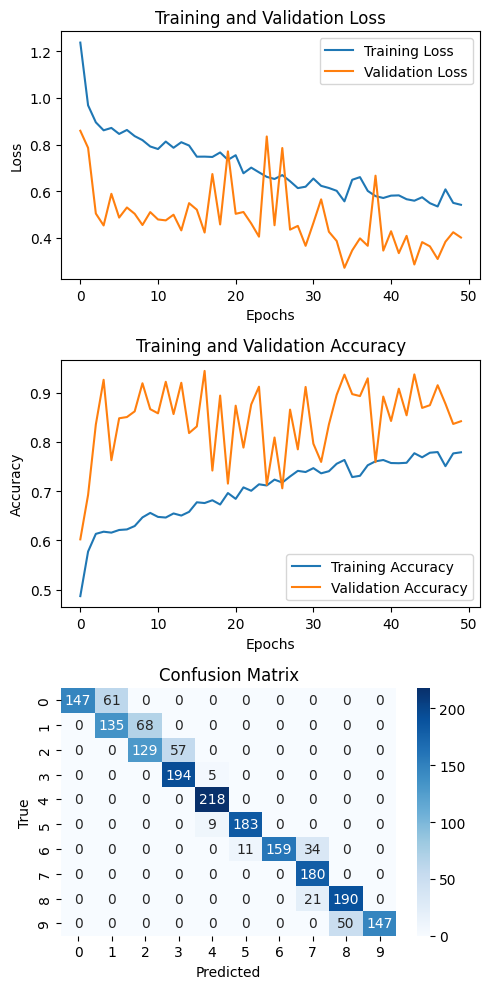

Classification Report:
               precision    recall  f1-score   support

       blues       1.00      0.71      0.83       208
   classical       0.69      0.67      0.68       203
     country       0.65      0.69      0.67       186
       disco       0.77      0.97      0.86       199
      hiphop       0.94      1.00      0.97       218
        jazz       0.94      0.95      0.95       192
       metal       1.00      0.78      0.88       204
         pop       0.77      1.00      0.87       180
      reggae       0.79      0.90      0.84       211
        rock       1.00      0.75      0.85       197

    accuracy                           0.84      1998
   macro avg       0.86      0.84      0.84      1998
weighted avg       0.86      0.84      0.84      1998



In [18]:
print("Applying PCA to the data.")
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Training model on PCA-transformed data.")
X_train_pca_reshaped = X_train_pca.reshape(X_train_pca.shape[0], 1, 1, X_train_pca.shape[1])
X_test_pca_reshaped = X_test_pca.reshape(X_test_pca.shape[0], 1, 1, X_test_pca.shape[1])
model_pca, hist_pca = build_and_train_model(X_train_pca_reshaped, X_test_pca_reshaped, y_train, y_test, X_train_pca.shape[1])
evaluate_and_plot(model_pca, X_test_pca_reshaped, y_test, hist_pca)

In [19]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.6 MB/s eta 0:00:00


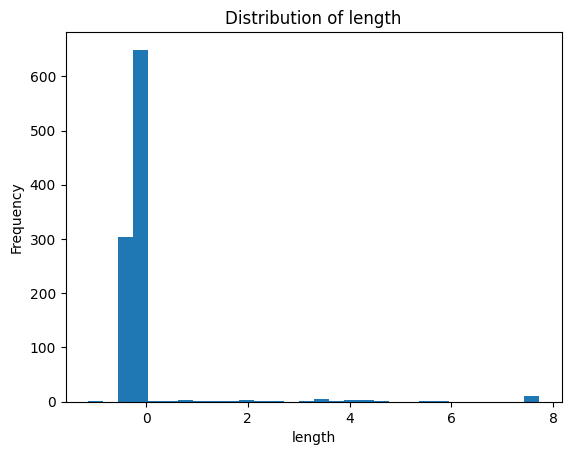

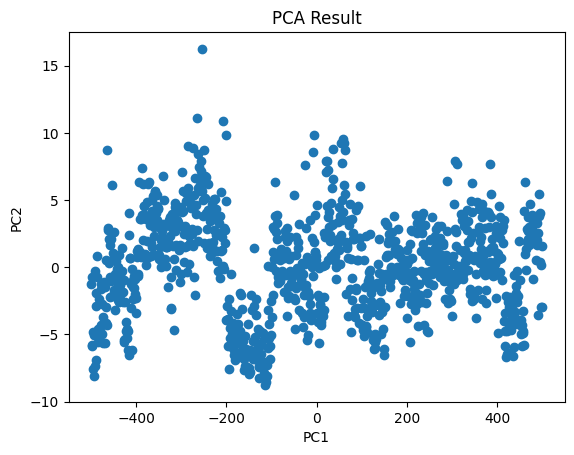

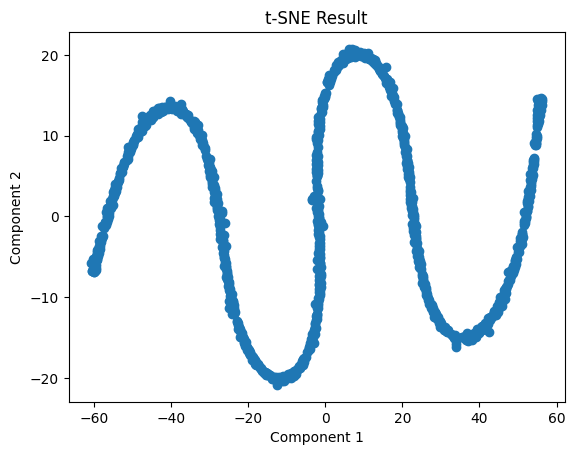

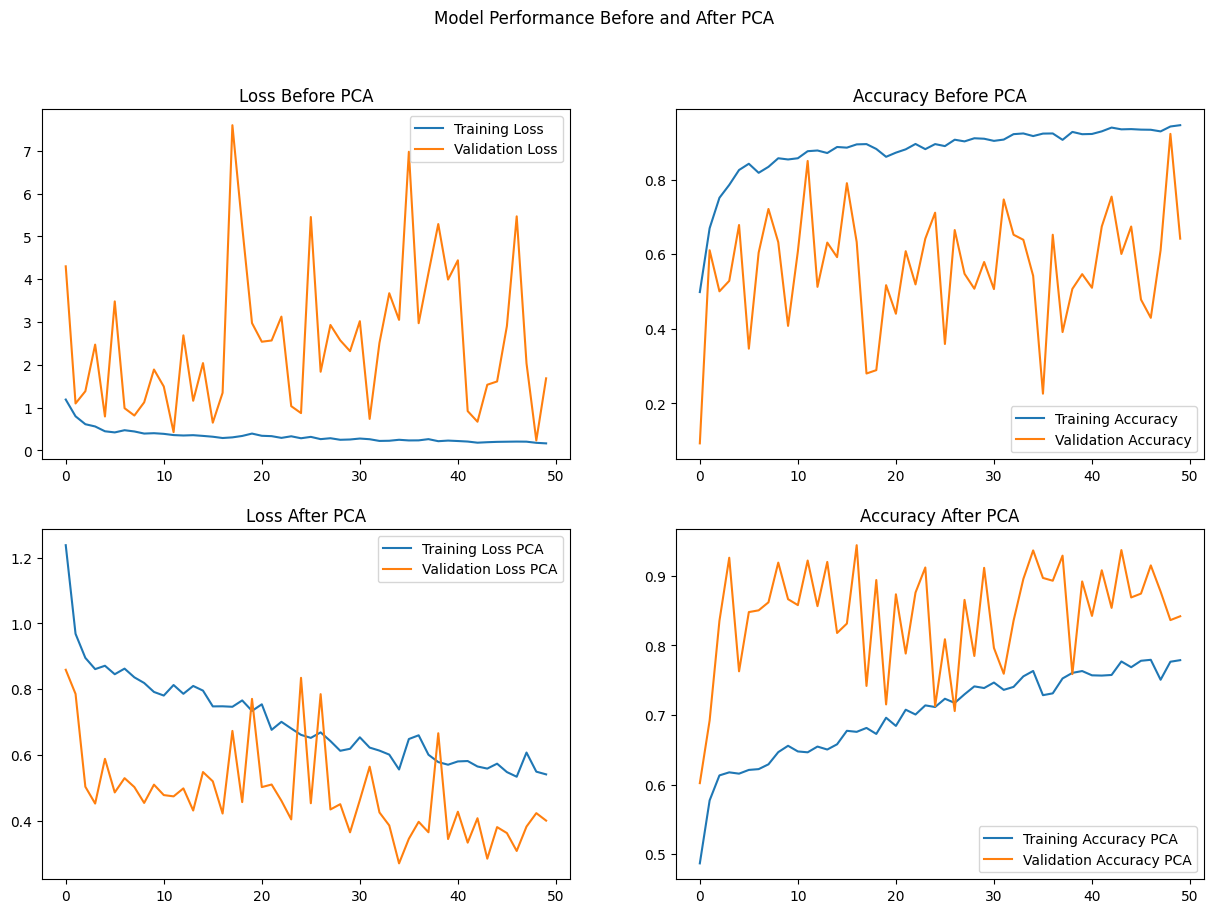

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Prepare PCA and t-SNE Data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_30_sec_scaled)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_30_sec_scaled)

# Convert results to DataFrame for easier plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
tsne_df = pd.DataFrame(tsne_result, columns=['Component 1', 'Component 2'])

def plot_feature_distribution(selected_feature):
    plt.figure()
    plt.hist(features_30_sec_scaled[selected_feature], bins=30)
    plt.title(f'Distribution of {selected_feature}')
    plt.xlabel(selected_feature)
    plt.ylabel('Frequency')
    plt.show()

def plot_pca():
    plt.figure()
    plt.scatter(pca_df['PC1'], pca_df['PC2'])
    plt.title('PCA Result')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

def plot_tsne():
    plt.figure()
    plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'])
    plt.title('t-SNE Result')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

def plot_model_performance(hist_original, hist_pca):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Performance Before and After PCA')

    # Training and validation loss before PCA
    axs[0, 0].plot(hist_original.history['loss'], label='Training Loss')
    axs[0, 0].plot(hist_original.history['val_loss'], label='Validation Loss')
    axs[0, 0].set_title('Loss Before PCA')
    axs[0, 0].legend()

    # Training and validation accuracy before PCA
    axs[0, 1].plot(hist_original.history['accuracy'], label='Training Accuracy')
    axs[0, 1].plot(hist_original.history['val_accuracy'], label='Validation Accuracy')
    axs[0, 1].set_title('Accuracy Before PCA')
    axs[0, 1].legend()

    # Training and validation loss after PCA
    axs[1, 0].plot(hist_pca.history['loss'], label='Training Loss PCA')
    axs[1, 0].plot(hist_pca.history['val_loss'], label='Validation Loss PCA')
    axs[1, 0].set_title('Loss After PCA')
    axs[1, 0].legend()

    # Training and validation accuracy after PCA
    axs[1, 1].plot(hist_pca.history['accuracy'], label='Training Accuracy PCA')
    axs[1, 1].plot(hist_pca.history['val_accuracy'], label='Validation Accuracy PCA')
    axs[1, 1].set_title('Accuracy After PCA')
    axs[1, 1].legend()

    plt.show()

# Example usage
selected_feature = features_30_sec_scaled.columns[0]
plot_feature_distribution(selected_feature)
plot_pca()
plot_tsne()
plot_model_performance(hist_original, hist_pca)

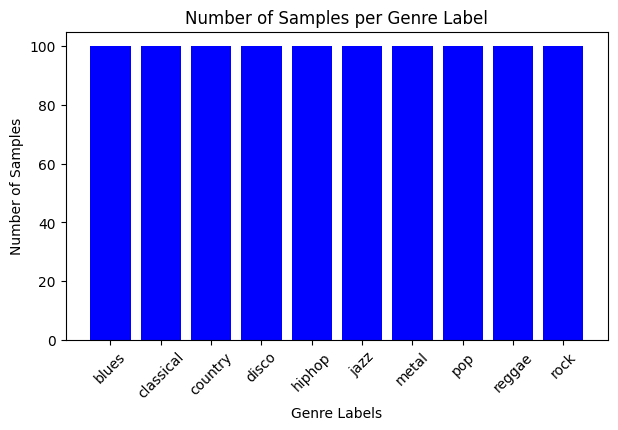

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each label
label_counts = features_30_sec['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(7, 4))
plt.bar(label_counts.index, label_counts.values, color='blue')
plt.xlabel('Genre Labels')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Genre Label')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()